In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## 1. Locate the Dataset

In [2]:
# Update this path if your dataset is elsewhere
dataset_path = os.path.expanduser(
    r"~/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages"
)
print("Dataset path:", dataset_path)
print("Classes:", os.listdir(dataset_path))

Dataset path: C:\Users\SamuelPC/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages
Classes: ['Cat', 'Dog']


## 2. Count Images in Each Class

In [3]:
for label in os.listdir(dataset_path):
    folder = os.path.join(dataset_path, label)
    if os.path.isdir(folder):
        num_images = len(os.listdir(folder))
        print(f"{label}: {num_images} images")

Cat: 12499 images
Dog: 12499 images


## 3. Visualize Random Images from Each Class

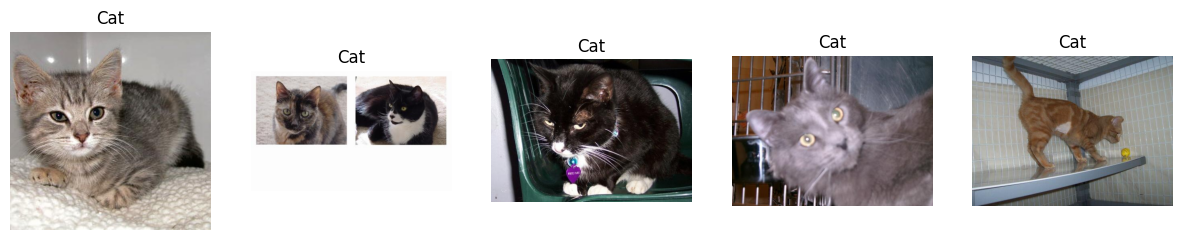

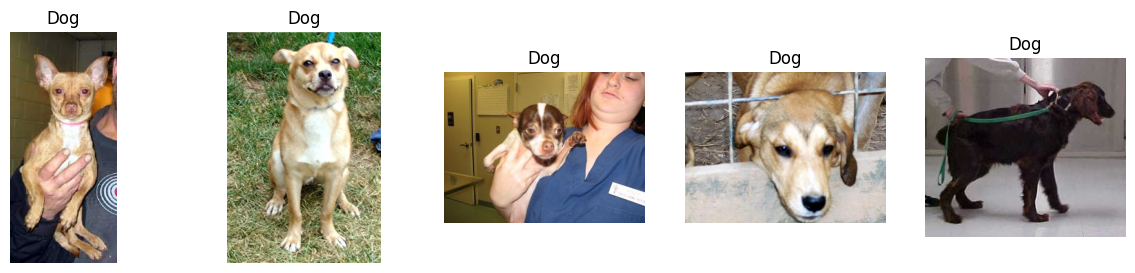

In [4]:
import random

def show_random_images(class_name, num_images=5):
    folder = os.path.join(dataset_path, class_name)
    images = [img for img in os.listdir(folder) if os.path.isfile(os.path.join(folder, img))]
    random_imgs = random.sample(images, min(num_images, len(images)))
    plt.figure(figsize=(15,3))
    for i, img_name in enumerate(random_imgs):
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path)
            plt.subplot(1, num_images, i+1)
            plt.imshow(img)
            plt.title(f"{class_name}")
            plt.axis('off')
        except Exception as e:
            continue
    plt.show()

show_random_images("Cat", 5)
show_random_images("Dog", 5)

## 4. Check for Corrupt Images

In [5]:
def count_corrupt_images(class_name):
    folder = os.path.join(dataset_path, class_name)
    images = [img for img in os.listdir(folder) if os.path.isfile(os.path.join(folder, img))]
    corrupt = 0
    for img_name in images:
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path)
            img.verify()  # Verify image integrity
        except Exception:
            corrupt += 1
    print(f"Corrupt images in {class_name}: {corrupt}")

count_corrupt_images("Cat")
count_corrupt_images("Dog")

Corrupt images in Cat: 0


e:\project\Cat_VS_Dog_Classifier\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Corrupt images in Dog: 0


## 5. Analyze Image Sizes

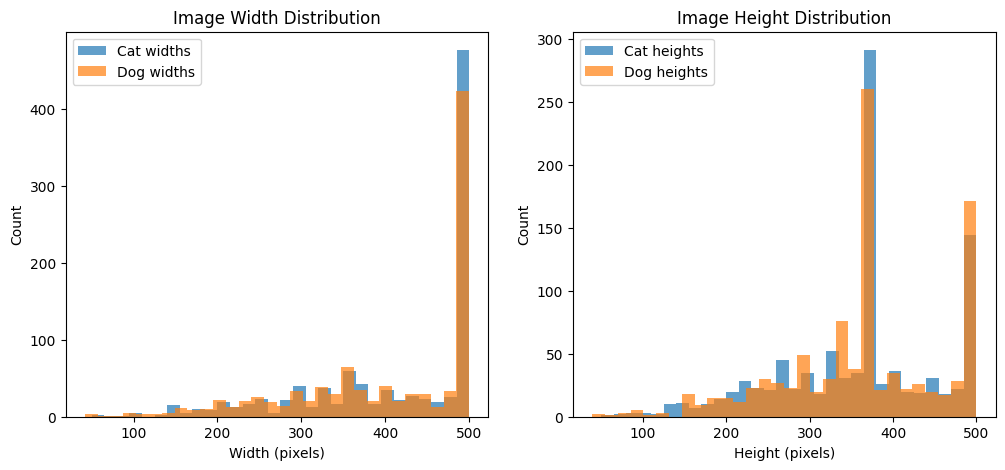

In [6]:
def get_image_sizes(class_name, max_images=1000):
    folder = os.path.join(dataset_path, class_name)
    images = [img for img in os.listdir(folder) if os.path.isfile(os.path.join(folder, img))]
    sizes = []
    for img_name in images[:max_images]:
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path)
            sizes.append(img.size)
        except Exception:
            continue
    return sizes

cat_sizes = get_image_sizes("Cat")
dog_sizes = get_image_sizes("Dog")

cat_widths, cat_heights = zip(*cat_sizes) if cat_sizes else ([], [])
dog_widths, dog_heights = zip(*dog_sizes) if dog_sizes else ([], [])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(cat_widths, bins=30, alpha=0.7, label='Cat widths')
plt.hist(dog_widths, bins=30, alpha=0.7, label='Dog widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')
plt.legend()
plt.title('Image Width Distribution')

plt.subplot(1,2,2)
plt.hist(cat_heights, bins=30, alpha=0.7, label='Cat heights')
plt.hist(dog_heights, bins=30, alpha=0.7, label='Dog heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')
plt.legend()
plt.title('Image Height Distribution')
plt.show()

## 6. Summary

- We checked the number of images per class.
- Visualized random samples.
- Detected corrupt images.
- Analyzed image size distribution.